## Importing the libraries.

In [167]:
# Import the Libraries which will be used in Analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing the data.

In [168]:
# Import the data frame.
ipl = pd.read_csv(r"C:\Users\DELL\Downloads\archive (2)\ipl_2022_dataset.csv", encoding ="unicode_escape")

### About the data: This dataset is about the mega auction that was held for IPL 2022. The IPL 2022 Mega Player auction have featured a total of 600 players who were set to go under the hammer in Bengaluru. The initial list had over 1000 cricketers who had registered for the auction. However, the final list was trimmed to 590. There was a total of 217 slots spread across ten franchises up for grabs. Among the 600 players, 229 are capped players, 371 are uncapped players.

## Understanding the data.

In [169]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [170]:
ipl.shape

(633, 8)

In [171]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN Rs (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [172]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        633 non-null    int64  
 1   Player            633 non-null    object 
 2   Base Price        633 non-null    object 
 3   TYPE              633 non-null    object 
 4   COST IN Rs (CR.)  237 non-null    float64
 5   Cost IN $ (000)   237 non-null    float64
 6   2021 Squad        199 non-null    object 
 7   Team              633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


## Cleaning the data.

### Dropped the Unnamed: 0 colum which is not useful for analysis.

In [173]:
# dropped the Unnamed: 0 colum which is not useful for analysis.

ipl.drop('Unnamed: 0', axis=1, inplace=True)

In [174]:
ipl.head()

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


### Checking for the null values.

In [175]:
ipl.isnull().sum()

Player                0
Base Price            0
TYPE                  0
COST IN Rs (CR.)    396
Cost IN $ (000)     396
2021 Squad          434
Team                  0
dtype: int64

In [176]:
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


### Replacing the null values in Cost in Dollar and Cost in Rs. column with 0.

In [177]:
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)
ipl['COST IN Rs (CR.)'] = ipl['COST IN Rs (CR.)'].fillna(0)

In [178]:
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


### Replacing the null values in 2021 Squad column with value "Not Participated".

In [179]:
ipl['2021 Squad'] = ipl['2021 Squad'].fillna('Not Participated')

In [180]:
ipl.isnull().sum()

Player              0
Base Price          0
TYPE                0
COST IN Rs (CR.)    0
Cost IN $ (000)     0
2021 Squad          0
Team                0
dtype: int64

In [181]:
teams = ipl[ipl['COST IN Rs (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

### Creating a new Status column holding values as Sold and unsold.

In [182]:
ipl['Status'] = ipl['Team'].replace(teams, 'Sold')

In [183]:
ipl

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


### Checking for duplicate values.

In [184]:
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


## Exploratory Data Analysis(EDA).

## Number of each type of player.

In [185]:
# How many types of players have participated?

types = ipl['TYPE'].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


## Pie Chart indicating for percentage of each player type.

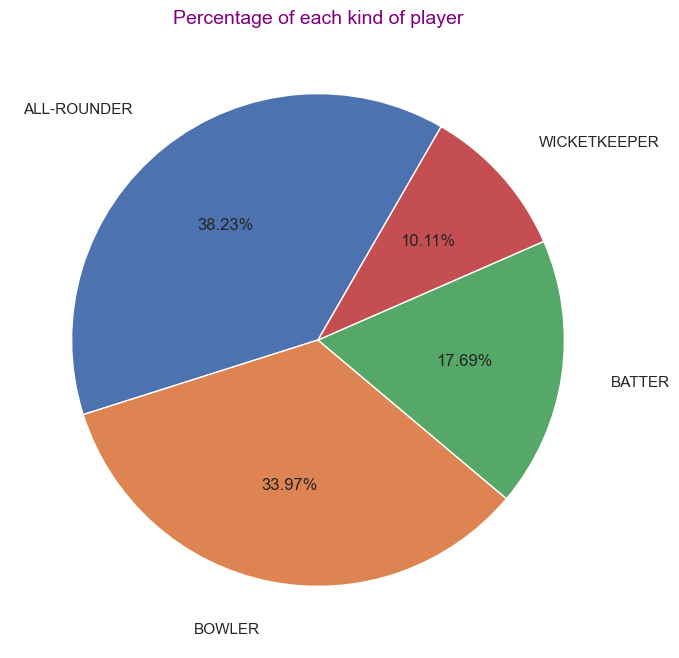

In [186]:
plt.figure(figsize=(10,8))
plt.pie(types.values, labels=types.index, labeldistance=1.2, autopct='%1.2f%%', shadow=False, startangle=60)
plt.title('Percentage of each kind of player', fontsize=14, color='Purple')
plt.show()

### From the pie chart it is clear that most number of partcipating players are All-rounders followed by Bowlers and then batter. Wicket keepers were least in number.

## Bar Graph for number of Sold and Unsold players.

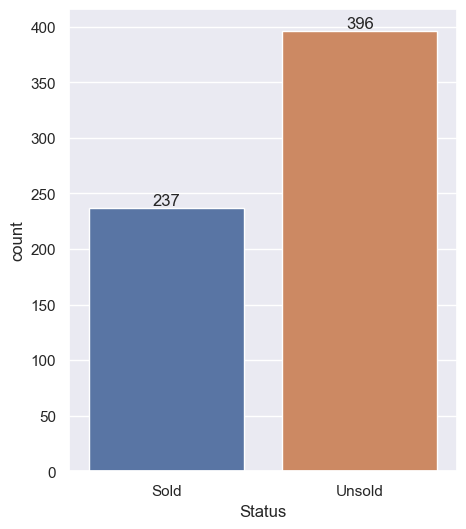

In [187]:
# Counting number of sold vs Unsold players using Bargraph.
plt.figure(figsize=(5,6))
ax = sns.countplot(x='Status', data=ipl)

for bars in ax.containers:
    ax.bar_label(bars)

### 237 Players were sold and 396 players reamined unsold in 2022 auction.

## Number of Players bought by each team.

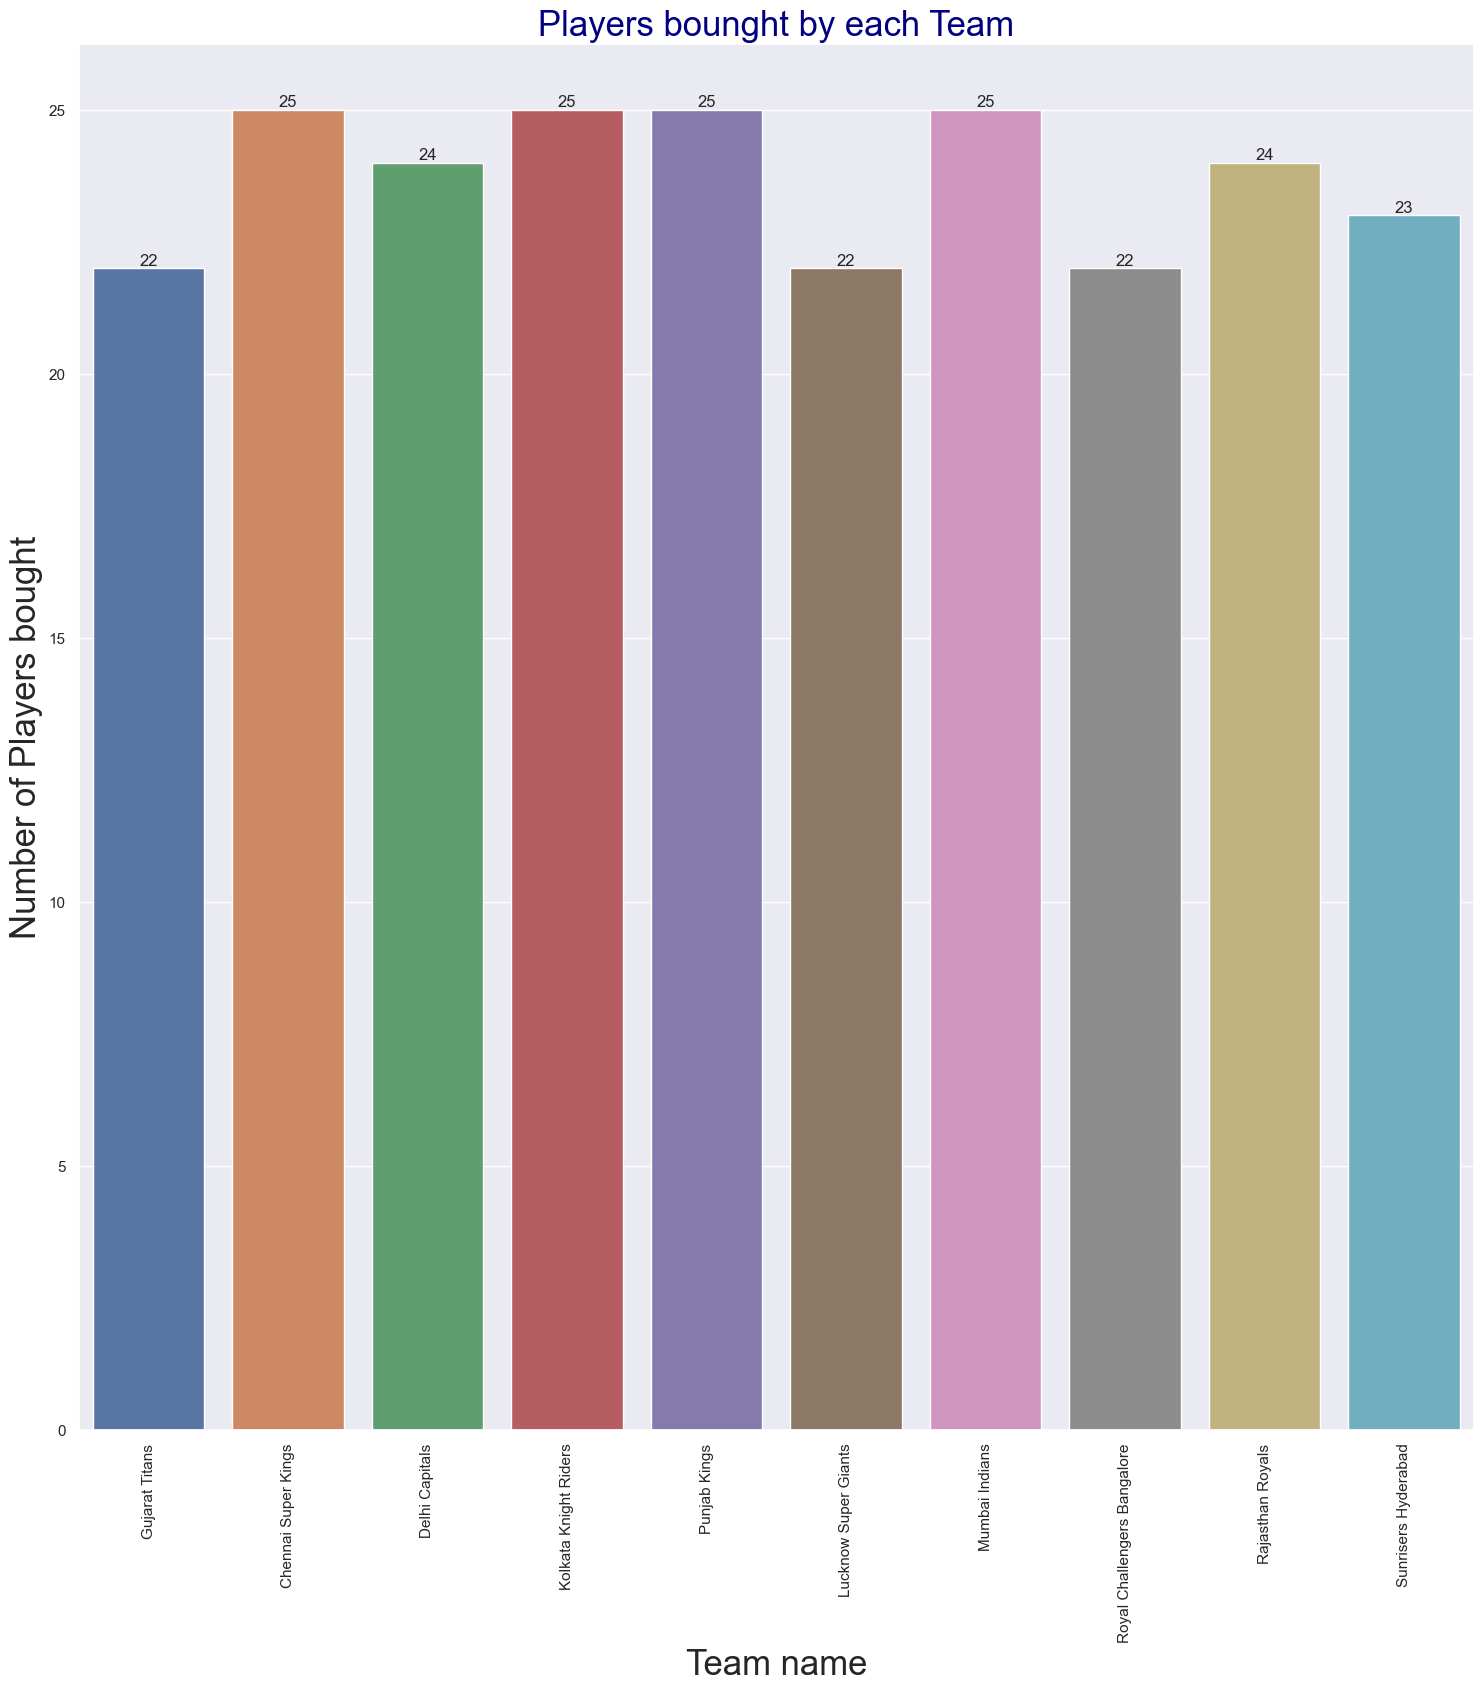

In [188]:
plt.figure(figsize=(18, 18))
ax = sns.countplot( x= (ipl[ipl['Team'] != 'Unsold']['Team']))

plt.xticks(rotation = 90)
plt.xlabel('Team name', fontsize=25)
plt.ylabel('Number of Players bought', fontsize=25)
plt.title('Players bounght by each Team', fontsize=25, color='Navy')
for bars in ax.containers:
    ax.bar_label(bars)

### CSK, KKR, Punjab Kings and MI bought highest number of players which is 25 players by each team.

## Creating new "retention" column and replacing the values in retention column with From Auction and Draft Pick value.

In [189]:
ipl['retention'] = ipl['Base Price']

In [190]:
ipl['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '1.5 Cr', '75 Lakh', '50 Lakh', '30 Lakh'], 
                         'From_Auction', inplace = True)

In [191]:
# Traeating Base Price

ipl['Base Price'].replace('Draft Pick', 0, inplace=True)

## Splitting the base price column into Base price and base price unit.

In [192]:
ipl['base_price_unit'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [193]:
ipl['base_price'].replace('retained', 0, inplace= True)

In [212]:
ipl.head(10)

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.00,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,From_Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,Sold,From_Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.00,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0
5,Mohammad Shami,2 Cr,BOWLER,6.25,812.5,PBKS,Gujarat Titans,Sold,From_Auction,Cr,2
6,Yash Dayal,20 Lakh,BOWLER,3.20,416.0,Not Participated,Gujarat Titans,Sold,From_Auction,Lakh,20
7,David Miller,1 Cr,BATTER,3.00,390.0,RR,Gujarat Titans,Sold,From_Auction,Cr,1
8,R. Sai Kishore,20 Lakh,BOWLER,3.00,390.0,CSK,Gujarat Titans,Sold,From_Auction,Lakh,20
9,Abhinav Sadarangani,20 Lakh,BATTER,2.60,338.0,Not Participated,Gujarat Titans,Sold,From_Auction,Lakh,20


## Retained and purchased players in each team.

In [195]:
gp = ipl.groupby(['Team', 'retention'])['retention'].count()[:-1]
gp

Team                         retention   
Chennai Super Kings          From_Auction    21
                             Retained         4
Delhi Capitals               From_Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From_Auction    19
Kolkata Knight Riders        From_Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From_Auction    19
Mumbai Indians               From_Auction    21
                             Retained         4
Punjab Kings                 From_Auction    23
                             Retained         2
Rajasthan Royals             From_Auction    21
                             Retained         3
Royal Challengers Bangalore  From_Auction    19
                             Retained         3
Sunrisers Hyderabad          From_Auction    20
                             Retained         

### Bar Graph.

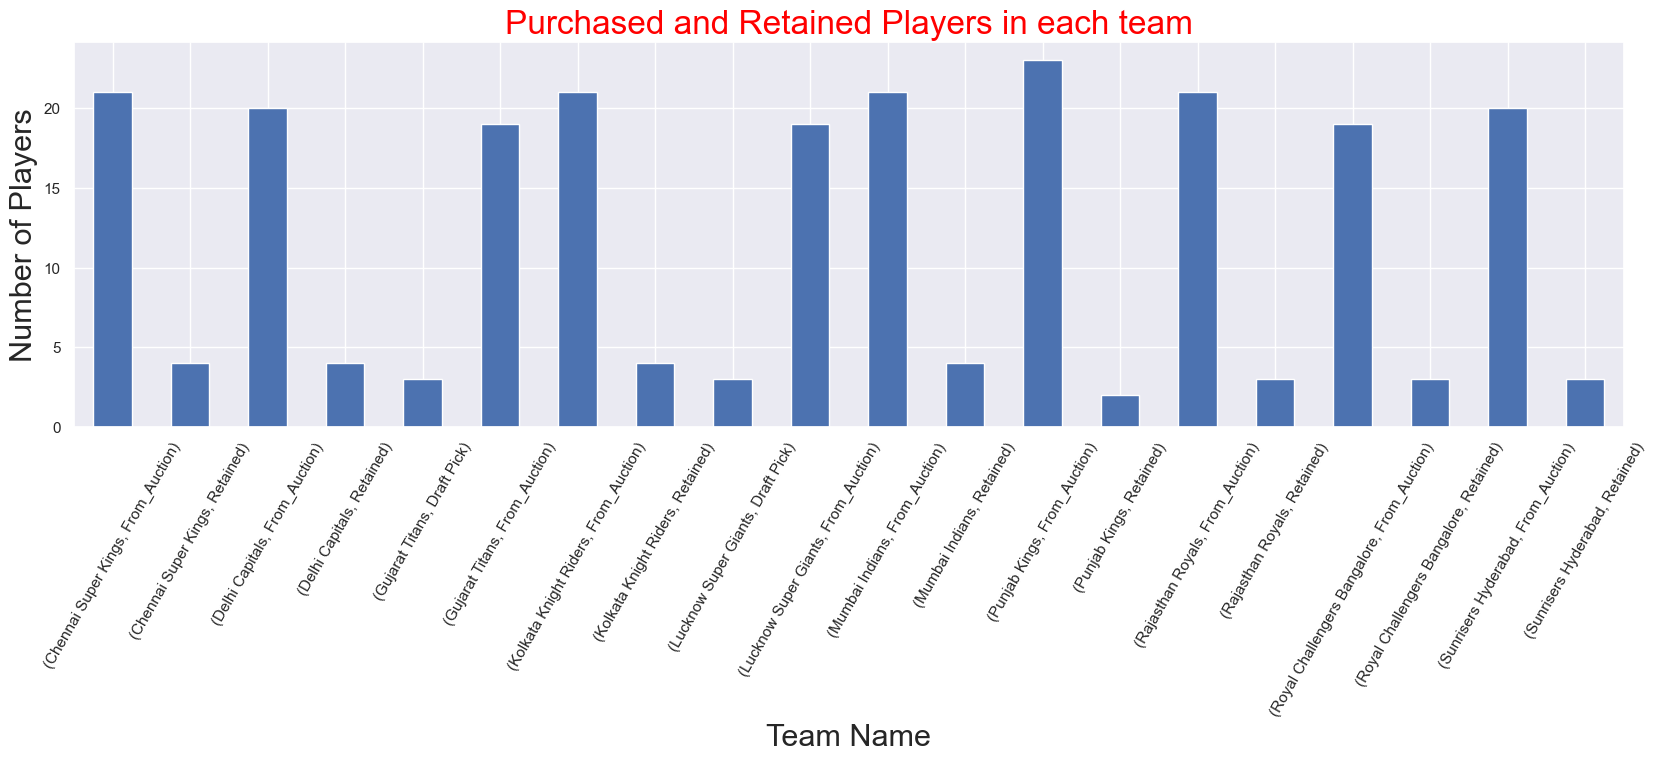

In [196]:
plt.figure(figsize=(20,5))

gp.plot( x= 'retention', kind='bar')
plt.title('Purchased and Retained Players in each team', fontsize=24, color='Red')
plt.xlabel('Team Name', fontsize=22)
plt.ylabel('Number of Players', fontsize=22)
plt.xticks(rotation=60)
plt.show()

### Clearly Punjab Kings retained least number of players whereas CSK, KKR and MI reatined highest number of players before the auction.
### Punjab Kings purchased highest number of players followed by RR, MI, KKR and CSK.

## Highest amount spend by each Team on single Player.


In [197]:
ipl[ipl['retention']=='From_Auction'].groupby(['Team'])['COST IN Rs (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN Rs (CR.), dtype: float64

### Clearly MI purchased the most costly player of 15.25 Crore.

In [198]:
ipl[ipl['retention']=='Retained'].sort_values('COST IN Rs (CR.)', ascending=False).head()

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained,Retained,Retained
47,Rishabh Pant,Retained,WICKETKEEPER,16.0,2080.0,DC,Delhi Capitals,Sold,Retained,Retained,Retained
143,Rohit Sharma,Retained,BATTER,16.0,2080.0,MI,Mumbai Indians,Sold,Retained,Retained,Retained
168,Virat Kohli,Retained,BATTER,15.0,1950.0,RCB,Royal Challengers Bangalore,Sold,Retained,Retained,Retained
214,Kane Williamson,Retained,BATTER,14.0,1820.0,SRH,Sunrisers Hyderabad,Sold,Retained,Retained,Retained


### Ravindra Jadeja, Rishabh Pant and Rohit Sharma got the highest price among the retained players.

## Bowlers who got the highest price.


In [209]:
ipl_bowler = ipl[(ipl['retention']=='From_Auction') & (ipl['TYPE']=='BOWLER')].sort_values('COST IN Rs (CR.)', ascending= False).head()
ipl_bowler

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,Sold,From_Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,Sold,From_Auction,Cr,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,Sold,From_Auction,Cr,1
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,From_Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,Sold,From_Auction,Lakh,20


### Deepak Chahar and Shardul Thakur are the bowlers who got the highest price in auction.

## Batters who got the highest price.


In [203]:
ipl[(ipl['retention']=='From_Auction') & (ipl['TYPE']=='BATTER')].sort_values('COST IN Rs (CR.)', ascending= False).head()

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,Sold,From_Auction,Cr,2
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,Sold,From_Auction,Cr,1.5
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,Sold,From_Auction,Lakh,40
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,Sold,From_Auction,Cr,2
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,Sold,From_Auction,Cr,2


### Shreyas Iyer received the highest price of 12.25 Cr among the purchased Batters.

## All-rounders who got the highest price.


In [204]:
ipl[(ipl['retention']=='From_Auction') & (ipl['TYPE']=='ALL-ROUNDER')].sort_values('COST IN Rs (CR.)', ascending= False).head()

,Player,Base Price,TYPE,COST IN Rs (CR.),Cost IN $ (000),2021 Squad,Team,Status,retention,base_price_unit,base_price
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,Sold,From_Auction,Cr,1
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Sold,From_Auction,Cr,1
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,Sold,From_Auction,Cr,2
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,Sold,From_Auction,Lakh,40
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,Sold,From_Auction,Lakh,40


### Liam Livingstone received highest price of 11.50 Cr among the purchased All-rounders.

## Conclusion:
## 1. From the pie chart it is clear that most number of partcipating players are All-rounders followed by Bowlers and then batter. Wicket keepers were least in number.
## 2. 237 Players were sold and 396 players reamined unsold in 2022 auction
## 3. CSK, KKR, Punjab Kings and MI bought highest number of players which is 25 players by each team.
## 4. Clearly Punjab Kings retained least number of players whereas CSK, KKR and MI reatined highest number of players before the auction.
## 5. Punjab Kings purchased highest number of players followed by RR, MI, KKR and CSK.
## 6. Clearly MI purchased the most costly player of 15.25 Crore.
## 7. Ravindra Jadeja, Rishabh Pant and Rohit Sharma got the highest price among the retained players.
## 8. Deepak Chahar and Shardul Thakur are the bowlers who got the highest price in auction.
## 9. Shreyas Iyer received the highest price of 12.25 Cr among the purchased Batters.
## 10. Liam Livingstone received highest price of 11.50 Cr among the purchased All-rounders.